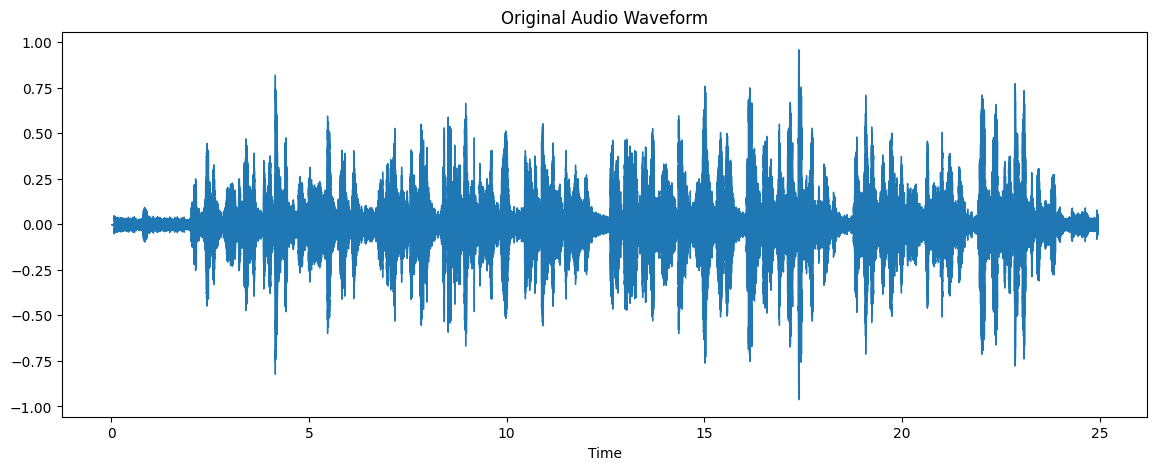

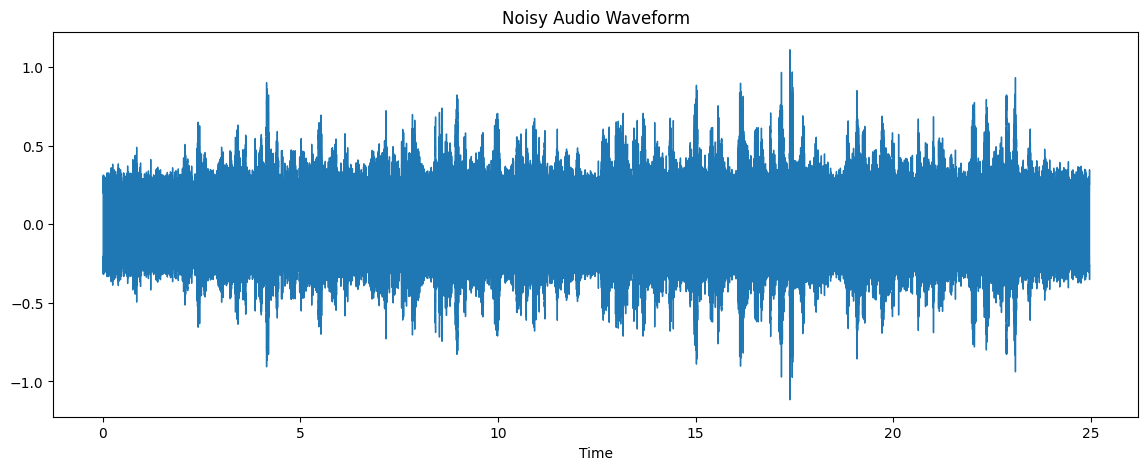

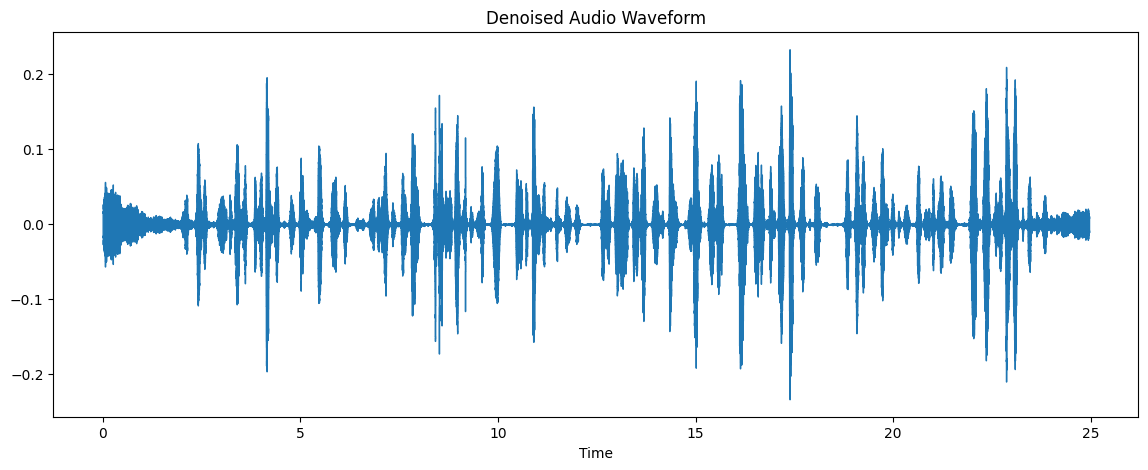

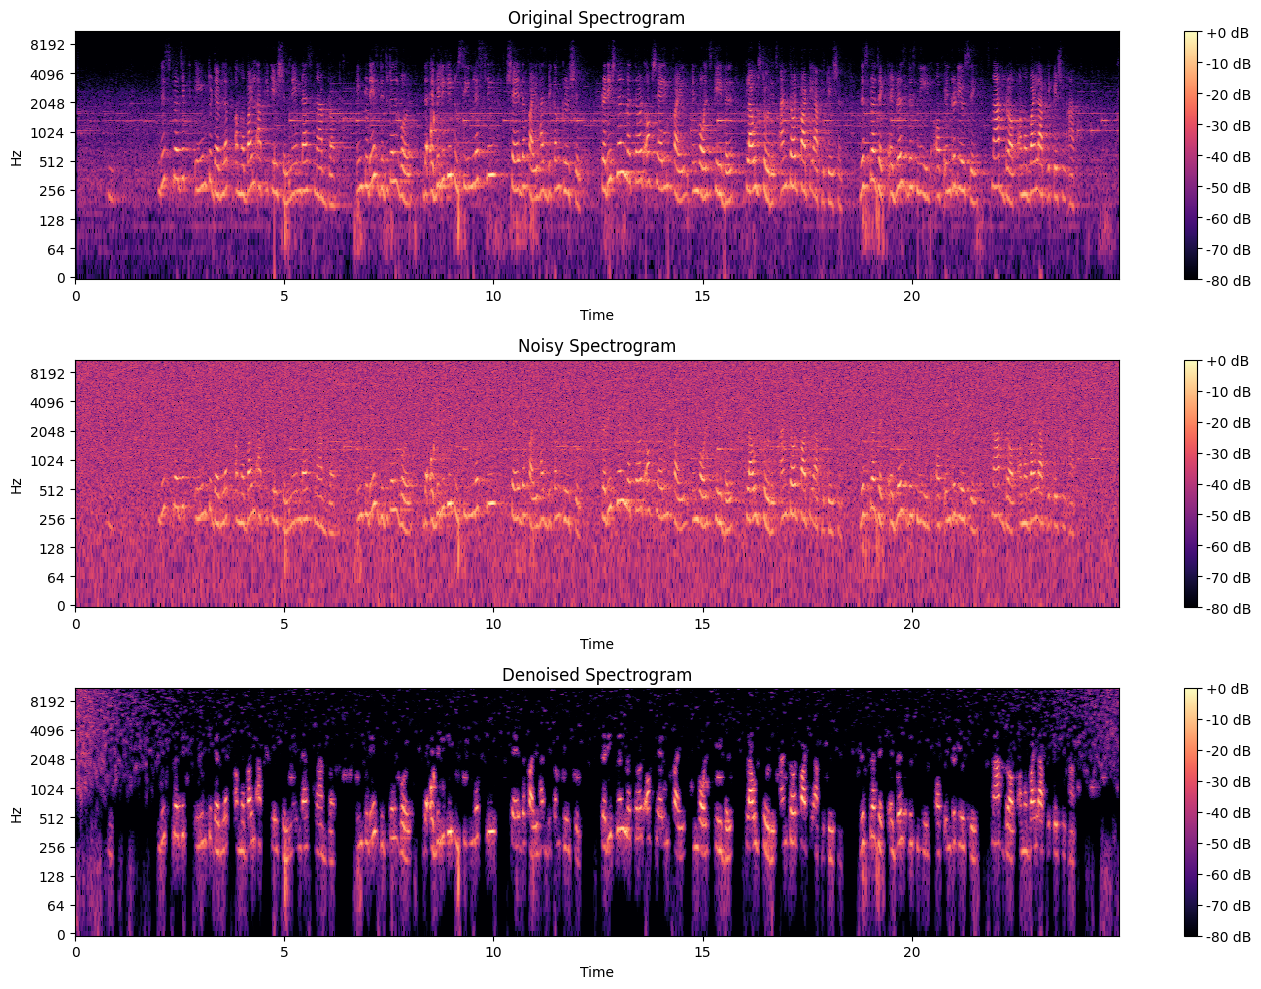

In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import noisereduce as nr

audio_path = 'audio1.wav' 
y, sr = librosa.load(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Waveform')
plt.show()
ipd.display(ipd.Audio(y, rate=sr))

# Adding synthetic noise to the audio signal
noise = np.random.normal(0, 0.1, y.shape)
y_noisy = y + noise

# Display and play the noisy audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_noisy, sr=sr)
plt.title('Noisy Audio Waveform')
plt.show()
ipd.display(ipd.Audio(y_noisy, rate=sr))

# Perform noise reduction using spectral gating
y_denoised = nr.reduce_noise(y=y_noisy, sr=sr)

# Display and play the denoised audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_denoised, sr=sr)
plt.title('Denoised Audio Waveform')
plt.show()
ipd.display(ipd.Audio(y_denoised, rate=sr))

# Perform STFT on the original, noisy, and denoised audio
D_original = librosa.stft(y)
D_noisy = librosa.stft(y_noisy)
D_denoised = librosa.stft(y_denoised)

# Convert amplitude to decibel
S_db_original = librosa.amplitude_to_db(np.abs(D_original), ref=np.max)
S_db_noisy = librosa.amplitude_to_db(np.abs(D_noisy), ref=np.max)
S_db_denoised = librosa.amplitude_to_db(np.abs(D_denoised), ref=np.max)

# Display the spectrograms for original, noisy, and denoised audio
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
librosa.display.specshow(S_db_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(S_db_noisy, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Noisy Spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(S_db_denoised, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Denoised Spectrogram')

plt.tight_layout()
plt.show()